In [20]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout


In [21]:
train_dataset_path = "D:/Deep Learning/Deep Learning - Datasets/Brain Tumor/Training"
test_dataset_path = "D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Testing"

In [22]:
input_shape = (224,224,3)

train_datagen = ImageDataGenerator(
rescale= 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(input_shape[0],input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset=None
)

test_generator = train_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(input_shape[0],input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset=None
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [23]:
model = Sequential([
    Conv2D(64,kernel_size=3,input_shape=(224,224,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(16,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(384,activation='relu'),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax'),
])

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_generator,epochs=3,validation_data=test_generator)

Epoch 1/3
90/90 [==============================] - 133s 1s/step - loss: 1.0167 - accuracy: 0.5463 - val_loss: 1.6728 - val_accuracy: 0.3782
Epoch 2/3
90/90 [==============================] - 130s 1s/step - loss: 0.6106 - accuracy: 0.7314 - val_loss: 2.4898 - val_accuracy: 0.5178
Epoch 3/3
90/90 [==============================] - 135s 1s/step - loss: 0.4097 - accuracy: 0.8376 - val_loss: 2.4211 - val_accuracy: 0.5761


In [26]:
import os 
labels = os.listdir("D:/Deep Learning/Deep Learning - Datasets/Brain Tumor/Training")
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [34]:
import random

def get_random_paths(path):
    imgs = []
    for root,dir,files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                imgs.append(os.path.join(root,file))
    random_image_path = random.choice(imgs)
    return random_image_path
                

In [35]:
x_test_path = get_random_paths("D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Testing")

In [36]:
print(x_test_path)

D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Testing\meningioma_tumor\image(17).jpg


In [40]:
import numpy as np 
from keras.preprocessing import image
img = image.load_img(x_test_path,target_size = (input_shape[0],input_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,0)

img_array.ndim

4

1/1 [==============================] - 0s 66ms/step
meningioma_tumor


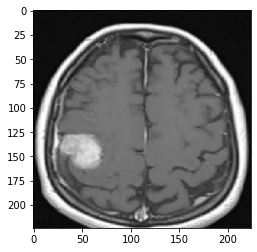

In [42]:
import matplotlib.pyplot as plt


predicted_values = model.predict(img_array)
output = np.argmax(predicted_values)

predicted_class = labels[output]
plt.imshow(img)
print(predicted_class)

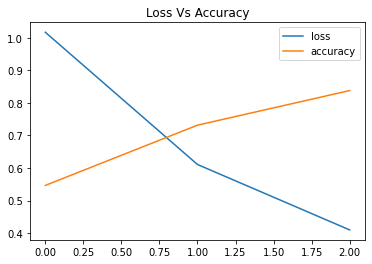

In [43]:
plt.title('Loss Vs Accuracy')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()